#  Death/Golden Cross SPY
Robert Sloan <br>
5/23/2019 <br>
Replicating Al Zmyslowski's AAII CIMI Market Review - Technical & Economic Indicators<br>
Death/Golden Cross SPDR S&P 500 ETF (SPY)<br>
Using Yahoo Adjusted Close for SPY in calculations.<br>
This measures the 50 day simple moving average (SMA) vs the 200 day SMA on the SPY.<br>
If the 50 day is above the 200 day SMA conditions are bullish; if below the 200 day conditions are bearish.<br>


## load libraries

In [10]:
import pandas as pd
pd.__version__
import matplotlib.pyplot as plt
#all matplotlib plots will be done inline in jupyter notebook
%matplotlib inline 

## using pandas-datareader to get Yahoo data
getting finacial data using panda-datareader https://github.com/pydata/pandas-datareader
<br>
First must install package at a command prompt in terminal:  > conda install -c anaconda pandas-datareader


In [11]:
from pandas_datareader import data

### handle dates and times

In [12]:
import datetime
currentDT = datetime.datetime.now()
#print(str(currentDT))
todays_date = str(currentDT.year) + "-" + str(currentDT.month) + "-"+  str(currentDT.day)
print(todays_date)

2019-5-23


### get SPY adjusted close

count    2363.000000
mean      175.772054
std        59.182810
min        85.641502
25%       118.484879
50%       178.700760
75%       217.317558
max       294.029999
Name: Adj Close, dtype: float64

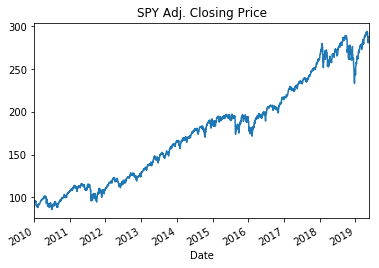

In [13]:
# Get the SPY adjusted close.
start_date = '2010-01-04'
end_date = todays_date

spy_data = data.DataReader("SPY", 
                       start=start_date, 
                       end=end_date, 
                       data_source='yahoo')['Adj Close']


spy_data.plot(title='SPY Adj. Closing Price')# Convert the adjusted closing prices to cumulative returns.
spy_data.head()
spy_data.describe()

### Calculate 50 and 200 day simple moving averages

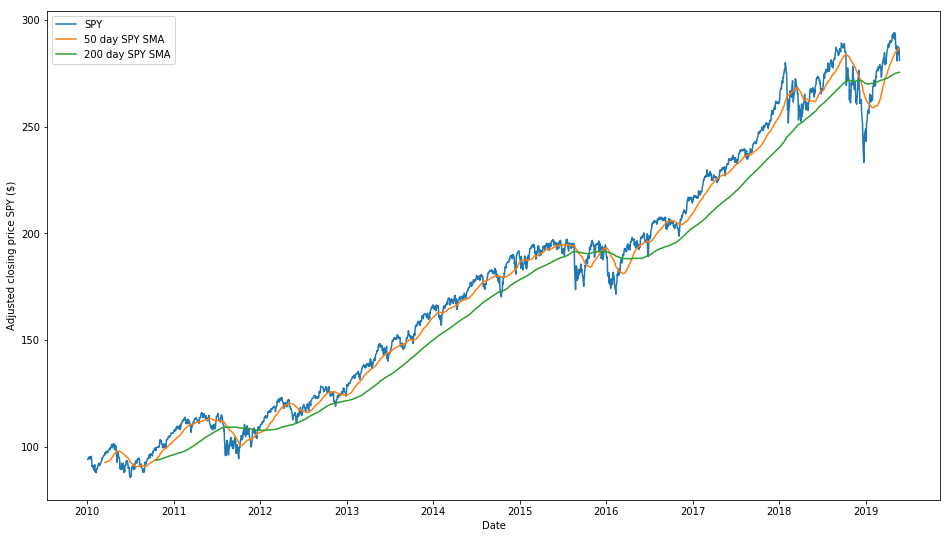

In [14]:
# Get the spy_data timeseries. This now returns a Pandas Series object indexed by date.

# Calculate the fifty day and 200 day simple moving averages of the closing prices of the SPY
spy_50d_sma = spy_data.rolling(window=50).mean()
spy_200d_sma = spy_data.rolling(window=200).mean()

# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(spy_data.index, spy_data, label='SPY')
ax.plot(spy_50d_sma.index, spy_50d_sma, label='50 day SPY SMA')
ax.plot(spy_200d_sma.index, spy_200d_sma, label='200 day SPY SMA')

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price SPY ($)')
ax.legend()

### Determine going 'Long' or 'Short' when moving averages cross

In [15]:
# Current Day 50 day and 200 day SPY SMA
current_spy = spy_data.loc[todays_date]
print("today's SPY " + str(current_spy))
current_spy_50d_sma = spy_50d_sma.loc[todays_date]
print("50 day " + str(current_spy_50d_sma))
current_spy_200d_sma = spy_200d_sma.loc[todays_date]
print("200 day " + str(current_spy_200d_sma))
# Determin if 50 day SPY SMA is greater than 200 day SMA and how much
cross_spy = current_spy_50d_sma - current_spy_200d_sma
print("50 day SMA - 200 day SMA " + str(cross_spy))
cross_spy_percent = round(cross_spy/current_spy,1)
print(cross_spy_percent)
if (cross_spy>1):
    status_cross = 'LONG'
else:
    status_cross = 'SHORT'
print(status_cross)
    

today's SPY 281.0799865722656
50 day 286.792939453125
200 day 275.5095696258545
50 day SMA - 200 day SMA 11.283369827270462
0.0
LONG


### Create DataFrame with result

In [16]:
indicators = pd.DataFrame([{'Technical Indicator': 'Death/Golden Cross SPY', 'Type': 'Market Timer', 'Status': status_cross,
                          'Value': str(cross_spy_percent), 'Comment': "50/200 crossover; 0.0 is lower limit"}], 
                           columns=['Technical Indicator', 'Type', 'Status', 'Value', 'Comment'])
indicators

,Technical Indicator,Type,Status,Value,Comment
0,Death/Golden Cross SPY,Market Timer,LONG,0.0,50/200 crossover; 0.0 is lower limit


### Output to Excel file

In [17]:
writer = pd.ExcelWriter('indicator_sheet Death Golden Cross SPY.xlsx')
indicators.to_excel(writer,'Indicators', index=False)
writer.save()